# Loading the data prep and cleaning from kaggle notebook into module 

In [1]:
from data_preparation import *

In [2]:
df = deduplication(df)
df = invalid_entries(df)
df = missing_values(df)
df = encode_categorical_features(df)
class_weights = calculate_class_weights(73012, 3008)

Number of Duplicate Records: 4807
Number of Duplicate Rows (After): 0
Invalid Entries:
 var3                       107
var15                        0
imp_ent_var16_ult1           0
imp_op_var39_comer_ult1      0
imp_op_var39_comer_ult3      0
                          ... 
saldo_medio_var44_hace3      0
saldo_medio_var44_ult1       0
saldo_medio_var44_ult3       0
var38                        0
TARGET                       0
Length: 370, dtype: int64
Invalid Entries After Imputation:
 var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 370, dtype: int64
Missing values in each column: var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer

In [3]:
from data_preparation import select_top_correlated_features

df_top_correlated = select_top_correlated_features(df, 'TARGET')

In [4]:
from sklearn.model_selection import train_test_split
import math

X = df_top_correlated
y = df['TARGET']

# Define the sizes of train, val, and test sets
N_total = len(df)
N_train = math.floor(0.8 * N_total)
N_val = math.floor((N_total - N_train) / 2)
N_test = N_total - N_train - N_val

# Split the data
X_train = df_top_correlated.iloc[:N_train]
y_train = df['TARGET'].iloc[:N_train]

X_val = df_top_correlated.iloc[N_train:N_train + N_val]
y_val = df['TARGET'].iloc[N_train:N_train + N_val]

X_test = df_top_correlated.iloc[N_train + N_val:N_train + N_val + N_test]
y_test = df['TARGET'].iloc[N_train + N_val:N_train + N_val + N_test]


In [4]:
from sklearn.model_selection import train_test_split

X = df_top_correlated
y = df['TARGET']

# Split into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Deep learning model and training

In [70]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

#Building model
model_nn=Sequential()
model_nn.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

In [41]:
model_nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 425 (1.66 KB)
Trainable params: 425 (1.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Compile model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# Train model
history=model_nn.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
3988/3988 [==============================] - 6s 1ms/step - loss: 2.6793 - accuracy: 0.9577 - val_loss: 1.2796 - val_accuracy: 0.9598
Epoch 2/10
3988/3988 [==============================] - 6s 1ms/step - loss: 1.7614 - accuracy: 0.9580 - val_loss: 0.2369 - val_accuracy: 0.9598
Epoch 3/10
3988/3988 [==============================] - 6s 1ms/step - loss: 0.7782 - accuracy: 0.9595 - val_loss: 0.2620 - val_accuracy: 0.9598
Epoch 4/10
3988/3988 [==============================] - 6s 1ms/step - loss: 0.2300 - accuracy: 0.9601 - val_loss: 0.1511 - val_accuracy: 0.9598
Epoch 5/10
3988/3988 [==============================] - 6s 1ms/step - loss: 0.1474 - accuracy: 0.9602 - val_loss: 0.1466 - val_accuracy: 0.9598
Epoch 6/10
3988/3988 [==============================] - 6s 1ms/step - loss: 0.1443 - accuracy: 0.9603 - val_loss: 0.1485 - val_accuracy: 0.9598
Epoch 7/10
3988/3988 [==============================] - 6s 1ms/step - loss: 0.1476 - accuracy: 0.9602 - val_loss: 0.1495 - val_accuracy:

In [47]:
# Evaluate the model on test data
test_loss, test_accuracy = model_nn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

334/334 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.9621
Test accuracy: 0.9620857238769531



Because my dataset is a binary classification type, for the neural network I will use sigmoid and binary cross entropy as the activation metric and the loss function. 

# Deep learning performance assessment

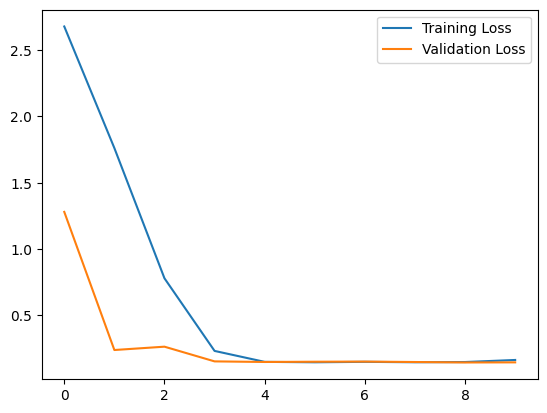

In [49]:

plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
plt.legend()

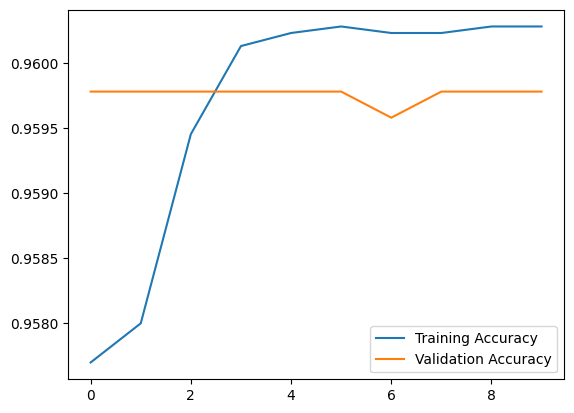

In [50]:

plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Looking at the loss function and accuracy performance with each epoc, you can definitely see the model improving with each epoch with the loss function. For the accuracy function, the validation set already seems to have started with a high accuracy and then dropped in accuracy for a bit before returning to the same performance as before which is odd.

In [53]:
scores=model_nn.evaluate(X_test, y_test)
print(scores)

334/334 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.9621
[0.1357923448085785, 0.9620857238769531]


In [54]:
model_nn.predict(X_test)

334/334 [==============================] - 0s 931us/step


array([[0.00567925],
       [0.00947813],
       [0.01718871],
       ...,
       [0.01722308],
       [0.02054601],
       [0.00777127]], dtype=float32)

In [55]:
X_Test_0= X_test[(y_test==0).to_numpy()]
X_Test_1= X_test[(y_test==1).to_numpy()]

13/13 [==============================] - 0s 1ms/step


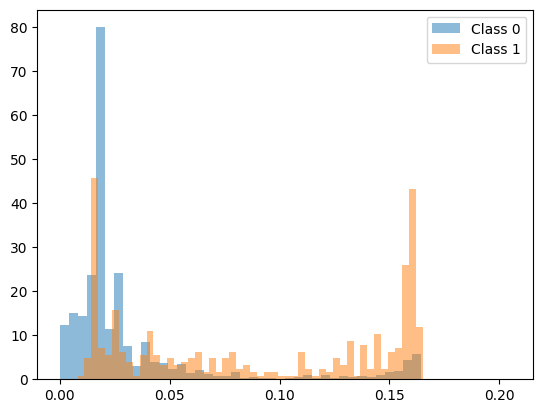

In [56]:

hist, bins,_=plt.hist(model_nn.predict(X_Test_0), density=1,bins=50,alpha=0.5,label='Class 0')
hist, bins,_=plt.hist(model_nn.predict(X_Test_1), density=1,bins=50,alpha=0.5,label='Class 1')
plt.legend()

There is a noticeable difference between the classes, but unlike Dr.Farbin's example, the classes are not separated so distinctly. It is still clear that the class 0 is on the lower end while class 1 is on the higher end.

334/334 [==============================] - 0s 878us/step


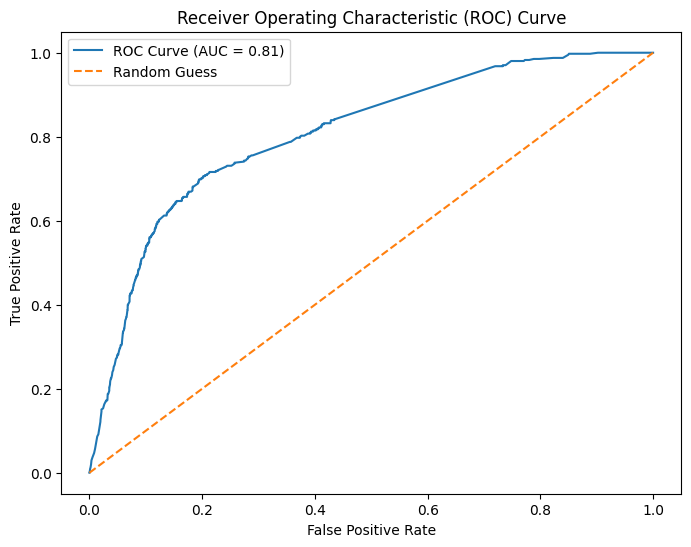

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, model_nn.predict(X_test))
roc_auc = auc(fpr, tpr)  

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Additionally, the roc curve for the nn shows an auc score of 0.81 which is quite good. It is much better than the decision tree model and a little bit better than the logistic regression model.

# Deep learning model 2 (using different hyperparameters)

In [57]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

#Building model
model_nn=Sequential()
model_nn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(16, activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

In [58]:
model_nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                640       
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# Compile model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [61]:
# Train model
history=model_nn.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/50
713/713 [==============================] - 2s 2ms/step - loss: 4.3748 - accuracy: 0.9308 - val_loss: 1.0942 - val_accuracy: 0.9580
Epoch 2/50
713/713 [==============================] - 1s 1ms/step - loss: 1.9288 - accuracy: 0.9285 - val_loss: 2.2284 - val_accuracy: 0.9620
Epoch 3/50
713/713 [==============================] - 1s 1ms/step - loss: 1.2307 - accuracy: 0.9323 - val_loss: 0.4736 - val_accuracy: 0.9580
Epoch 4/50
713/713 [==============================] - 1s 1ms/step - loss: 0.7279 - accuracy: 0.9397 - val_loss: 0.3628 - val_accuracy: 0.9617
Epoch 5/50
713/713 [==============================] - 1s 1ms/step - loss: 0.6119 - accuracy: 0.9427 - val_loss: 2.1565 - val_accuracy: 0.9617
Epoch 6/50
713/713 [==============================] - 1s 1ms/step - loss: 0.3648 - accuracy: 0.9532 - val_loss: 0.2625 - val_accuracy: 0.9596
Epoch 7/50
713/713 [==============================] - 1s 1ms/step - loss: 0.3718 - accuracy: 0.9505 - val_loss: 0.2055 - val_accuracy: 0.9606
Epoch 

# Deep learning performance assessment

In [62]:
# Evaluate the model on test data
test_loss, test_accuracy = model_nn.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

223/223 [==============================] - 0s 923us/step - loss: 0.1647 - accuracy: 0.9582
Test accuracy: 0.9581578373908997


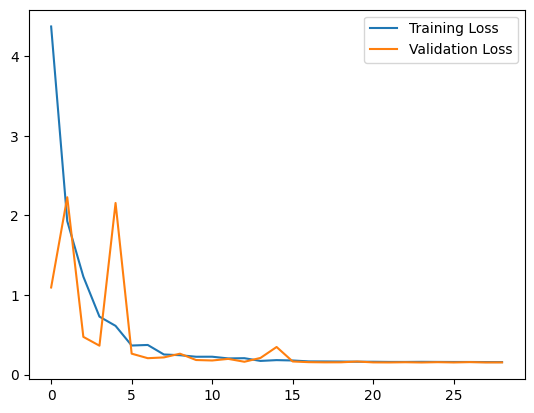

In [63]:
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
plt.legend()

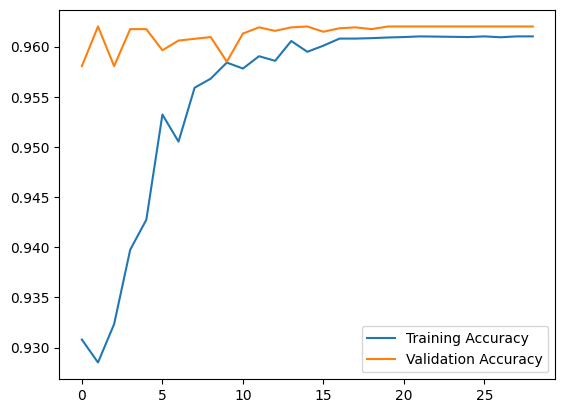

In [64]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Looking at the loss function and accuracy performance with each epoch, you can generally see the model improving with each epoch with the loss function. The validation loss keeps jumping up and down, but it is still moving in a generally downwards direction.

For the accuracy function, the validation set already seems to have started with a high accuracy and improved a little bit more before plateauing in performance. Th training accuracy showed more drastic improvement.

In [65]:
scores=model_nn.evaluate(X_test, y_test)
print(scores)

223/223 [==============================] - 0s 927us/step - loss: 0.1647 - accuracy: 0.9582
[0.16470642387866974, 0.9581578373908997]


In [66]:
model_nn.predict(X_test)

223/223 [==============================] - 0s 794us/step


array([[0.0525716 ],
       [0.06605678],
       [0.07485469],
       ...,
       [0.02771407],
       [0.0630485 ],
       [0.05810583]], dtype=float32)

In [67]:
X_Test_0= X_test[(y_test==0).to_numpy()]
X_Test_1= X_test[(y_test==1).to_numpy()]

10/10 [==============================] - 0s 1ms/step


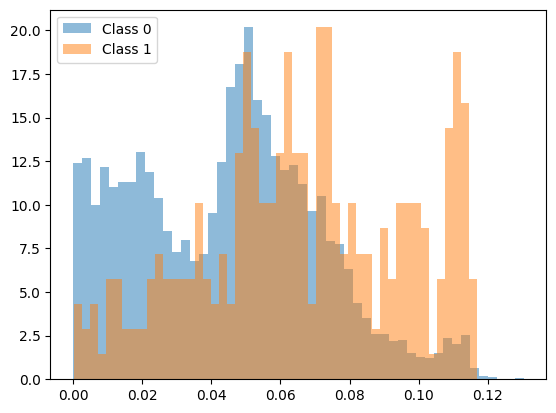

In [68]:

hist, bins,_=plt.hist(model_nn.predict(X_Test_0), density=1,bins=50,alpha=0.5,label='Class 0')
hist, bins,_=plt.hist(model_nn.predict(X_Test_1), density=1,bins=50,alpha=0.5,label='Class 1')
plt.legend()

There is some decent separation between the two classes, there is still a significant amount of overlap. 

223/223 [==============================] - 0s 841us/step


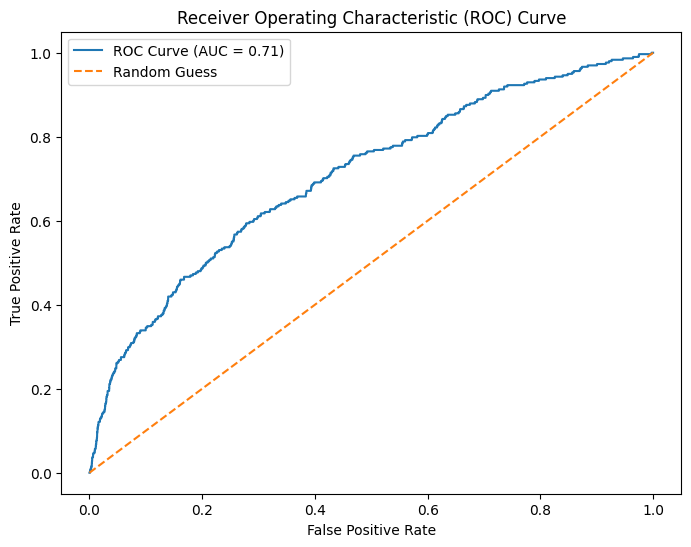

In [69]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model_nn.predict(X_test)[:, 0])

roc_auc = auc(fpr, tpr)  

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The AUC score is not bad but not very good either. The first deep learning model performed much better, indicating that these hyperparamters that I used are not the best ones.

# Compare deep learning model to logistic regression model

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
# Logistic regression
model = LogisticRegression(random_state=42, class_weight=class_weights_eq)

# Train model
model.fit(X_train, y_train)

# Make predictions on validation
y_val_pred = model.predict(X_val)

# Make predictions on test 
y_test_pred = model.predict(X_test)

Validation Set Accuracy: 0.6815203145478375
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     10257
           1       0.09      0.72      0.15       425

    accuracy                           0.68     10682
   macro avg       0.53      0.70      0.48     10682
weighted avg       0.95      0.68      0.78     10682


Test Set Accuracy: 0.6774948511514698
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     10277
           1       0.08      0.74      0.15       405

    accuracy                           0.68     10682
   macro avg       0.53      0.71      0.47     10682
weighted avg       0.95      0.68      0.78     10682



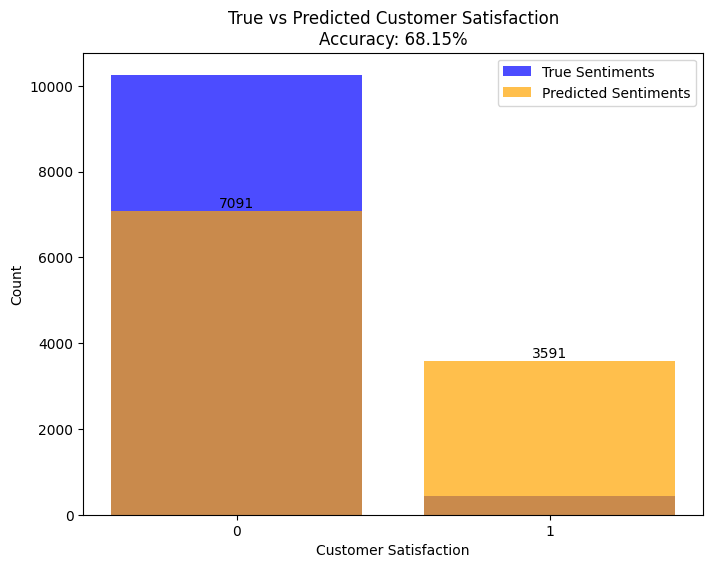

In [27]:
accuracy = accuracy_score(y_val, y_val_pred)

test_class_counts = np.bincount(y_val_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1), color='blue', alpha=0.7, label='True Sentiments')
ax.bar(np.arange(len(conf_matrix)), test_class_counts, color='orange', alpha=0.7, label='Predicted Sentiments')

# Annotate bars with counts
for i, count in enumerate(test_class_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

ax.set_xticks(np.arange(len(conf_matrix)))
ax.set_xticklabels(sorted(y_test.unique()))  
ax.set_xlabel('Customer Satisfaction')
ax.set_ylabel('Count')
ax.set_title(f'True vs Predicted Customer Satisfaction\nAccuracy: {accuracy * 100:.2f}%')
ax.legend()

plt.show()


The deep learning model is definitely much better in terms of accuracy, but again because there is such a drastic class imbalance this metric is misleading for showing how well the logistic regression model is doing. 

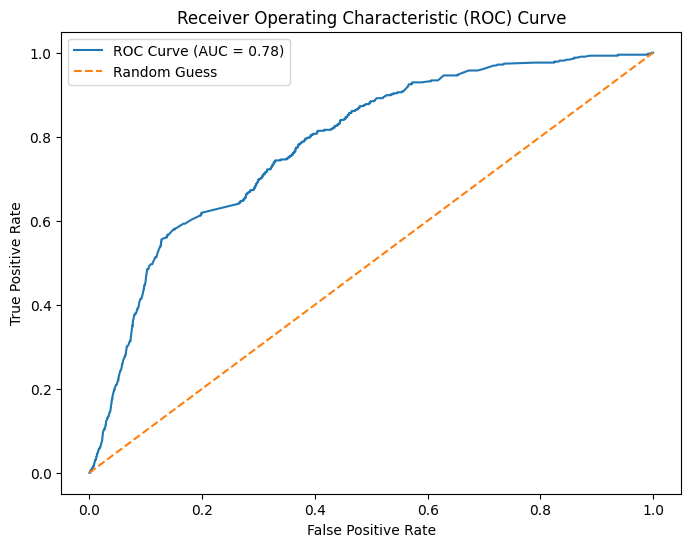

In [28]:
y_val_probs = model.predict_proba(X_val)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)

# AUC
auc = roc_auc_score(y_val, y_val_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Surprisingly, the logistic regression model is doing better then the second deep learning model but not as well as the first model.